In [1]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df = pd.read_csv("dataset/dataset.csv")
X = df.drop(columns=['0'])
y = pd.get_dummies(df["0"]).astype(int)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=8, activation="linear")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(from_logits=True))

In [8]:
history = model.fit(X, df["0"], epochs=50, batch_size=128)

Epoch 1/50


I0000 00:00:1738596946.488940    6896 service.cc:148] XLA service 0x7717d0016f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738596946.489047    6896 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-02-03 21:05:46.512588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738596946.620242    6896 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-03 21:05:46.675618: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


101/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9582  

I0000 00:00:1738596948.172453    6896 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.9256
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.4838
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.3270
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2471
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1973
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1621 
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1378
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1272
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1133
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0967
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0976
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0990
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0887
Epoch 15/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0

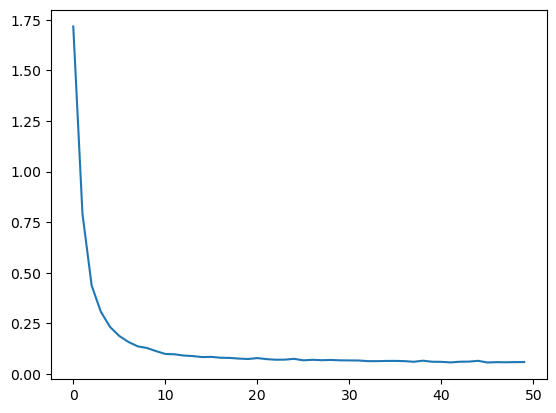

In [9]:
plt.plot(history.history["loss"])

In [9]:
import mediapipe as mp

gestures = ["UP", "DOWN", "LEFT", "RIGHT", "FORWARD", "BACKWARD", "CHANGE1", "CHANGE2"]


def main():

    cam = cv2.VideoCapture(0)

    mpHands = mp.solutions.hands
    hand_model = mpHands.Hands(max_num_hands=1)
    mpDraw = mp.solutions.drawing_utils

    while True:
        ret, frame = cam.read()
        frame = cv2.flip(frame, 1)
        frame = frame[:, 320:]
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # cv2.line(frame, (320, 0), (320, 480), (0, 255, 0), 1)

        predictions = hand_model.process(img)
        landmark_list= []

        if predictions.multi_hand_landmarks:
            for handLms in predictions.multi_hand_landmarks:
                mpDraw.draw_landmarks(frame, handLms, mpHands.HAND_CONNECTIONS)

                for i in range(21):
                    landmark_list += [handLms.landmark[i].x, handLms.landmark[i].y] 

                prediction = np.argmax(model.predict(pd.DataFrame(landmark_list).transpose()))
                print(prediction)
                cv2.putText(frame, gestures[prediction], (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)


        cv2.imshow("Camera", frame)
        if cv2.waitKey(50) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            cam.release()
            break


if __name__ == "__main__":
    main()

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6


In [7]:
model = tf.keras.models.load_model("/home/akansh_26/AIMS-DTU/Hand_Gesture_Drone_Controller/model/model_final_final1.h5")

2025-01-15 01:47:17.825659: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-15 01:47:17.825682: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: akansh26YogaPro7i
2025-01-15 01:47:17.825686: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: akansh26YogaPro7i
2025-01-15 01:47:17.825834: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2025-01-15 01:47:17.825848: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2025-01-15 01:47:17.825851: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0


In [7]:
model.save("/home/akansh_26/AIMS-DTU/Hand_Gesture_Drone_Controller/model/model_final_final1.h5")

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,359 (71.72 KB)

 Trainable params: 6,119 (23.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,240 (47.82 KB)